In [45]:
import numpy as np 
import matplotlib.pyplot as plt
import random

# Simulated Annealing 

simulated_annealing & scheduling
 
annealing =
processo de aquecimento de metais, vidros, etc. seguido de resfriamento lento e gradual, com objetivo de tornar o material mais duro;
simulated =
reproduzido por meio de um modelo, simulado;
scheduling =
arranjo de eventos no tempo, escalonamento.
Como o próprio nome diz, o algoritmo Simulated Annealing explora uma analogia entre o modo como um metal se resfria e congela numa estrutura critalina de energia mínima (o processo real de annealing) e a busca por um mínimo num sistema qualquer.

À maneira de algoritmos de minimização de função como Hill Climbing, Simulated Annealing, em cada iteração, procura o próximo candidato a ponto de mínimo na vizinhança do candidato corrente, agindo de acordo com a diferença entre os valores da função-objetivo (chamada, nesse contexto, de função de energia ou potencial). A maior vantagem de Simulated Annealing sobre outros métodos, em especial Hill Climbing, é a possibilidade de evitar mínimos locais: o algoritmo emprega, para isso, uma busca aleatória que, por vezes, aceita vizinhos cuja energia seja mais elevada. Ou seja, em algumas iterações, o Simulated Annealing tende a maximizar a função-objetivo em vez de minimizá-la.

Entretanto, uma característica importante desse algoritmo é que a probabilidade de se aceitar um vizinho de maior energia decresce com o tempo, o que se implementa com um parâmetro, a temperatura, que decresce a cada iteração. Por fim, em qualquer temperatura, dados dois vizinhos de maior energia que o candidato a mínimo corrente, A e B, energia(A) > energia(B), a probabilidade de aceitação de A será menor que a de B.

O processo de minimização pode ser resumido no seguinte algoritmo:
 

candidato <- s0;

T <- T0;

repita

próximo <- vizinho de 'candidato' tomado aleatoriamente1;

deltaE <- energia(próximo) - energia(candidato);

se deltaE <= 0

   então candidato <- próximo

   senão faça candidato <- próximo com probabilidade exp(-deltaE/T)2;

T <- próximaTemperatura(T);

até T < Tfinal

retorna candidato;
 
onde:
s0: estado (candidato a mínimo) inicial;
T0/Tfinal: temperatura inicial/final;
próximaTemperatura: função que calcula a temperatura vigente na próxima iteração;
 
Obs. (notas do algoritmo):
 
1: um dos pontos fundamentais de diferença entre Simulated Annealing e Hill Climbing;
2: expressão matemática que implementa a probabilidade variável de aceitação como explicada anteriormente.
Vale notar que T0, Tfinal e próximaTemperatura são parâmetros de entrada adicionais do algoritmo, para os quais não há uma escolha única sempre eficaz.

(fonte: https://sites.icmc.usp.br/sandra/G9_t2/annealing.htm#nota1)

## Descrição da função utilizada


Essa função é uma função definida por partes que calcula um valor para y baseado no valor de entrada x.

Se x for menor que -1 ou maior que 1, a função retornará 0. Caso contrário, a função retornará o resultado da soma das funções cos(50x) e sin(20x).

Essa função é um exemplo de uma função periódica, pois é composta por duas funções trigonométricas que se repetem periodicamente ao longo do eixo x. Além disso, a função só é não-zero dentro do intervalo limitado entre -1 e 1.

In [96]:
def function_ex_one(x):
    if x < -1 or x > 1:
        y = 0
    else:
        y =(np.cos(50*x) + np.sin(20*x))
    
    return y

hv_one = np.vectorize(function_ex_one)

Analisando o sinal gerado

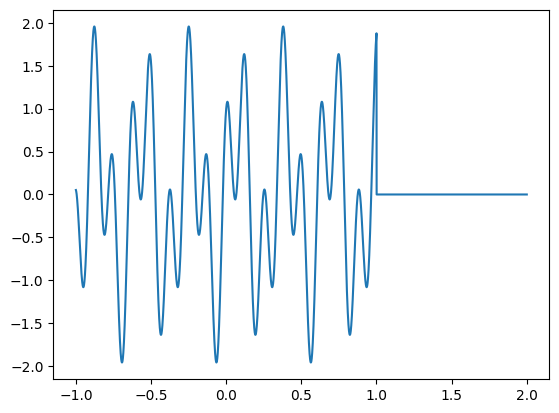

In [97]:
X = np.linspace(-1, 2, num=10000)

plt.plot(X, hv_one(X))

## Testando com um Slimples greedy Search

Esse algoritmo é uma implementação de busca gulosa simples para encontrar o máximo local de uma função unidimensional.

A ideia é começar com um valor inicial start e, em seguida, iterativamente analisar os valores da função nos vizinhos à direita e à esquerda do valor atual x. Em cada iteração, o algoritmo move para o vizinho que tem o maior valor da função. Isso é feito sob a suposição de que o máximo local estará próximo ao valor atual x.

A variável u é usada para definir a distância entre x e seus vizinhos. Quanto menor u, maior é a precisão do algoritmo, mas também pode aumentar o tempo de execução. O número de iterações é definido pelo parâmetro N.

O resultado da busca é o valor x que maximiza a função e uma lista history com os valores de x em cada iteração. A lista history pode ser usada para visualizar o processo de busca e a convergência para o máximo local.

É importante notar que este algoritmo só é garantido para encontrar o máximo local e não o máximo global, ou seja, a melhor solução pode estar em um ponto diferente do encontrado. Além disso, o algoritmo pode ficar preso em um ótimo local se a função tiver vários máximos locais próximos.

In [48]:
def simple_greedy_search(func, start=0, N=1000):
    x = start 
    history = []
    for i in range(N):
        history.append(x) # Mantém o histório dos passos 
        u = 0.001
        xleft, xright = x-u, x+u  # Análisa os vizinhos
        yleft, yright = func(xleft), func(xright)

        if yleft > yright:
            x = xleft
        else:
            x = xright
        

    return x, history

In [117]:
x0, history = simple_greedy_search(hv_one, start=0.02, N = 1000)

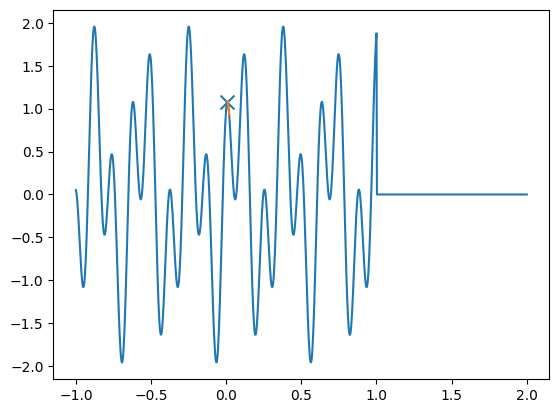

In [118]:
plt.plot(X, hv_one(X))
plt.scatter(x0, function_ex_one(x0), marker='x', s=100)
plt.plot(history, hv_one(history))

In [152]:
def simulated_annealing(search_space, func, T, interations):
    scale = np.sqrt(T)
    start = np.random.choice(search_space)
    x = start * 1
    cur = func(x)
    history = [x]
    for i in range(interations):
        prop = x + np.random.normal()*scale
        if prop > 1 or prop < 0 or np.log(np.random.rand()) * T > (func(prop) - cur):
            prop = x 
        x = prop
        cur = func(x)
        T = 0.9 * T
        history.append(x)

    return x, history

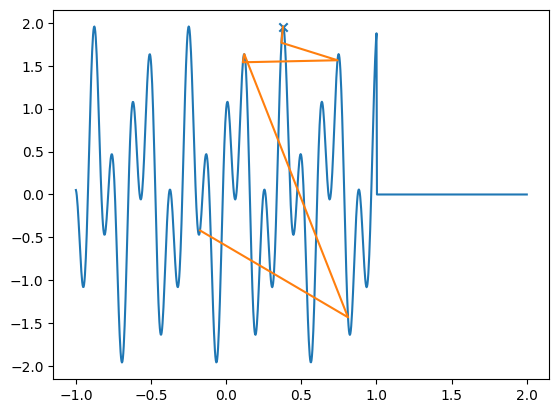

In [164]:
X = np.linspace(-1 , 2, num=1000)
x1, history = simulated_annealing(X, function_ex_one, T=4, interations=1000)

plt.plot(X, hv_one(X))
plt.scatter(x1,hv_one(x1), marker='x')
plt.plot(history, hv_one(history))

In [165]:
x1

0.3779588577875251

In [166]:
# ANALISANDO RESULTADO 
function_ex_one(x1)

1.9556885490610556

Nesse exemplo o algoritmo funciona de maneira semelhante a imagem abaixo

<img src='https://miro.medium.com/v2/resize:fit:640/0*RcP7dZOcpUZV5FUQ.gif'>

In [83]:
def get_vizinhos(solucao, aprendizado):
    vizinhos = []
    aprendizado = aprendizado / 10 if aprendizado >= 10 else 1
    constante = 0.005 / aprendizado
    vizinho_superior = solucao + constante if solucao + constante < 1 else solucao
    vizinho_inferior = solucao - constante if solucao - constante > 0 else solucao
    
    vizinhos.append(vizinho_superior)
    vizinhos.append(vizinho_inferior)
    return vizinhos

In [84]:
def get_valor_aleatorio(espaco, x=0):
    inicio = random.random()
    valor = []
    
    for i in espaco:
        diferenca = i - inicio
        if diferenca > 0.05 or diferenca < -0.05:
            valor.append(diferenca)

    if len(valor) == len(espaco) or x > 300:
        return inicio
    else:
        return get_valor_aleatorio(espaco, x = x + 1)

In [85]:
def hill_climbing(funcao_custo, solucao_inicial):
    # random.seed(a=0)
    solucao = solucao_inicial
    custos = []
    count = 1
    parar_no_plato = 0

    while count <= 400:
        vizinhos = get_vizinhos(solucao, count)
        
        atual = funcao_custo(solucao)
        melhor = atual 
        solucao_atual = solucao
        custos.append(atual)

        for i in range(len(vizinhos)):
            custo = funcao_custo(vizinhos[i])
            if custo >= melhor:
                parar_no_plato = parar_no_plato + 1 if custo == melhor else 0
                melhor = custo
                solucao = vizinhos[i]

        count += 1
        if melhor == atual and solucao_atual == solucao or parar_no_plato == 20:
            if parar_no_plato == 20: print('plato')
            break

    return solucao, custos

In [86]:
def plotar_busca(resultados):
    t = np.arange(0.0, len(resultados), 1)
    
    plt.figure(figsize=(12,8))
    plt.plot(t, resultados)
    plt.show()

Valor X: 0.37724293523088914
custos [1.0161653335114595, 1.2851873858430087, 1.5255384530793696, 1.7230070811534686, 1.8655287897609867, 1.943934053462428, 1.9525214979543732]


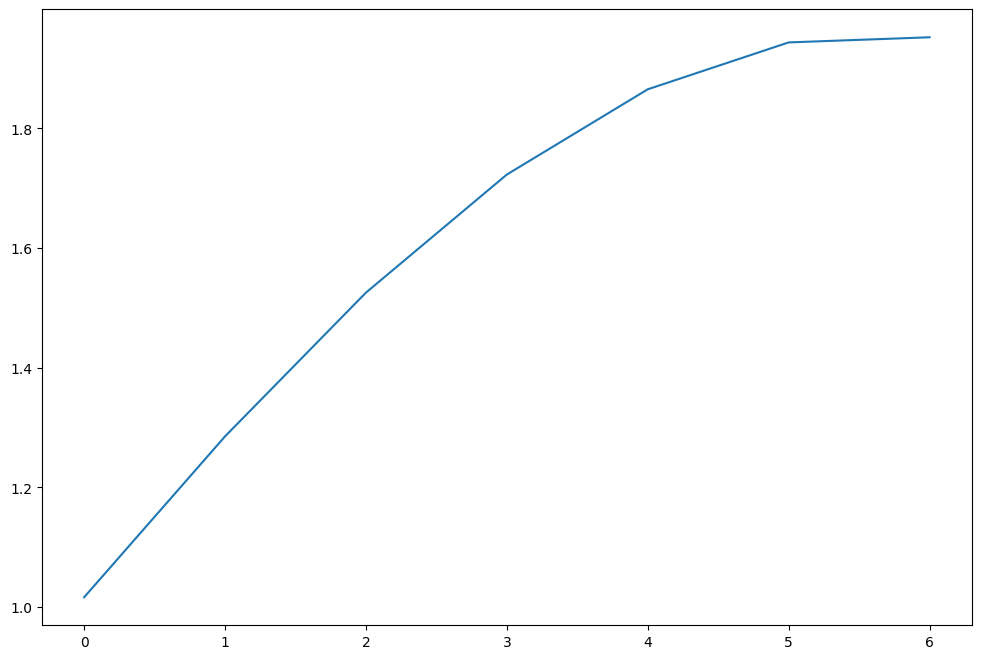

In [177]:
custos = []
solucao = []
espaco_solucao = []

for i in range(10):
    espaco_solucao.append(get_valor_aleatorio(espaco_solucao))
    
    solucao_subida_encosta = hill_climbing(function_ex_one, espaco_solucao[len(espaco_solucao) - 1])
    solucao.append(solucao_subida_encosta[0])
    custos.append(solucao_subida_encosta[1])

    if len(custos) > 1:
        if max(custos[1]) > max(custos[0]):
            custos.pop(0)
        else:
            custos.pop(1)
            
print('Valor X:', solucao_subida_encosta[0])
print('custos', solucao_subida_encosta[1])
plotar_busca(solucao_subida_encosta[1])


In [178]:
# ANALISANDO RESULTADO 
function_ex_one(solucao_subida_encosta[0])

1.9525214979543732

## Repetindo o mesmo processo com outra função

In [185]:
def function_ex_two(x):
    y = 2 ** -2*(x-0.1/0.9)**2 * (np.sin(5*np.pi * x))**6
    return y

hv_two = np.vectorize(function_ex_two)

Analisando o sinal gerado

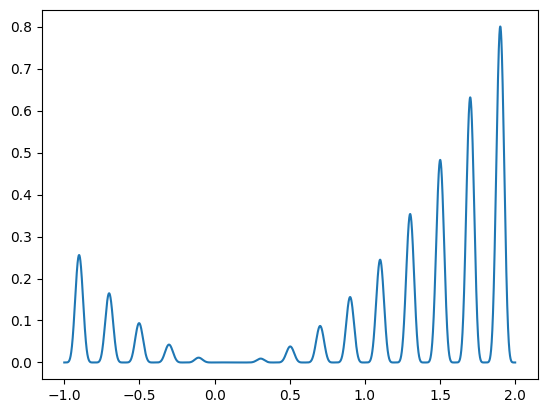

In [112]:
X = np.linspace(-1, 2, num=10000)

plt.plot(X, hv_two(X))

### Encontrando o ponto máximo atráves do greedy search

In [113]:
x0, history = simple_greedy_search(hv_two, start=0.02, N = 10000)

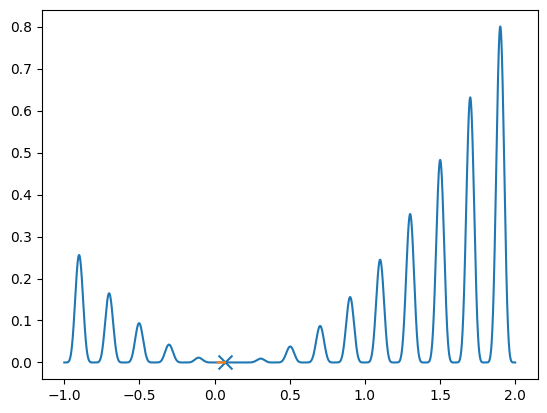

In [114]:
plt.plot(X, hv_two(X))
plt.scatter(x0, function_ex_two(x0), marker='x', s=100)
plt.plot(history, hv_two(history))

### Encontrando o ponto máximo atráves do simulated annealing

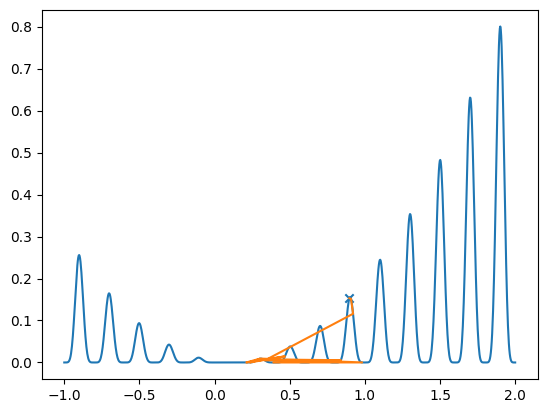

In [115]:
X = np.linspace(-1 , 2, num=1000)
x1, history = simulated_annealing(X, function_ex_two, T=4, interations=1000)

plt.plot(X, hv_two(X))
plt.scatter(x1,hv_two(x1), marker='x')
plt.plot(history, hv_two(history))

É possível perceber que, diferente da primeira função, apenas 1000 interações não foram suficientes para resolver o problema de maneira satisfatória. É notável também que a função em questão tem picos e vales bem mais acentuados.

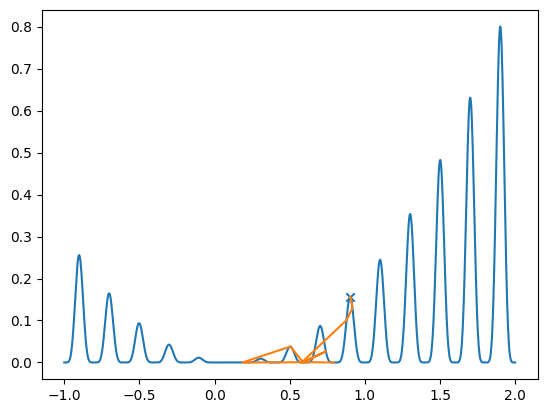

In [143]:
X = np.linspace(-1 , 2, num=1000)
x1, history = simulated_annealing(X, function_ex_two, T=10, interations=10000)

plt.plot(X, hv_two(X))
plt.scatter(x1,hv_two(x1), marker='x')
plt.plot(history, hv_two(history))

In [146]:
#VALOR MÁXIMO
max(history)

0.9173744822670016

In [147]:
# ANALISANDO RESULTADO 
function_ex_two(max(history))

0.12960465355650638

Pode-se analisar que para função acima o algoritmo simulated annealing não vai conseguir trazer melhores resultados mesmo aumentando consideravelmente o número de interações e alterando os valores de temperatura

# Analisando os resultados com o Hill Climbing

Valor X: 0.9024610591108502
custos [0.013847810261969308, 0.02235951767737762, 0.03372441786330858, 0.04791975495966784, 0.06455681312539668, 0.08285678863606934, 0.10168821067967768, 0.11966734206660687, 0.13531102145324753, 0.14722060349004715, 0.15426830731719177, 0.15585817070256774]


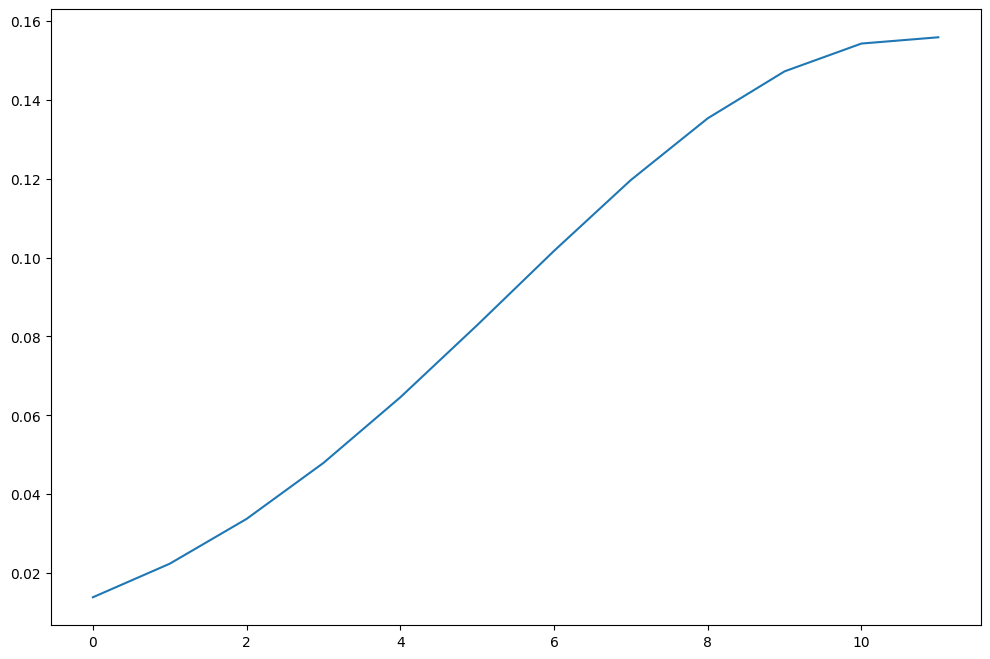

In [195]:
custos = []
solucao = []
espaco_solucao = []

for i in range(10):
    espaco_solucao.append(get_valor_aleatorio(espaco_solucao))
    
    solucao_subida_encosta = hill_climbing(function_ex_two, espaco_solucao[len(espaco_solucao) - 1])
    solucao.append(solucao_subida_encosta[0])
    custos.append(solucao_subida_encosta[1])

    if len(custos) > 1:
        if max(custos[1]) > max(custos[0]):
            custos.pop(0)
        else:
            custos.pop(1)
            
print('Valor X:', solucao_subida_encosta[0])
print('custos', solucao_subida_encosta[1])
plotar_busca(solucao_subida_encosta[1])


In [196]:
# ANALISANDO RESULTADO 
function_ex_two(solucao_subida_encosta[0])

0.15585817070256774

In [61]:
class Coordinate():
    def __init__(self, x, y) -> None:
        self.x = x
        self.y = y

    @staticmethod
    def get_distance(a, b):
        return np.sqrt(np.abs(a.x - b.x) + np.abs(a.y - b.y))
    @staticmethod
    def get_total_distance(coords):
        dist = 0
        for first, second in zip(coords[:-1], coords[1:]):
            dist += Coordinate.get_distance(first, second)
        dist += Coordinate.get_distance(coords[0], coords[-1])
        return dist

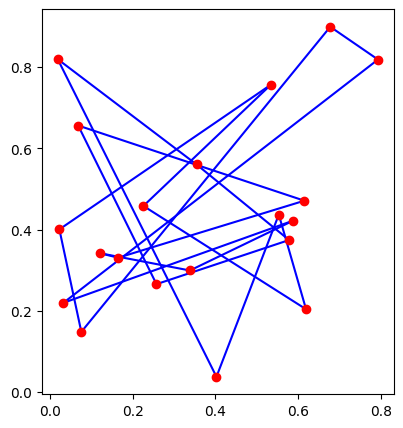

In [62]:
coords = []

for i in range(20):
    coords.append(Coordinate(np.random.uniform(), np.random.uniform()))

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
for first, second in zip(coords[:-1], coords[1:]):
    ax1.plot([first.x, second.x], [first.y, second.y], 'b')
 
ax1.plot([coords[0].x, coords[-1].x], [coords[0].y, coords[-1].y], 'b')


for c in coords:
    ax1.plot(c.x, c.y, 'ro')


plt.show()


In [63]:
cost0 = Coordinate.get_total_distance(coords)

T=30
factor = 0.99
T_init = T
 
for i in range(1000):
    print(i, 'cost =', cost0)

    T = T*factor
    for j in range(500):
        # Exchange two coordinates and get a new neighbour solution 
        r1, r2 = np.random.randint(0,len(coords), size = 2)
        temp = coords[r1]
        coords[r1] = coords[r2]
        coords[r2] = temp

        cost1 = Coordinate.get_total_distance(coords)

        if cost1 < cost0:
            cost0 = cost1
        else:
            x = np.random.uniform()
            if x < np.exp((cost0-cost1)/T):
                cost0 = cost1
            else:
                temp = coords[r1]
                coords[r1] = coords[r2]
                coords[r2] = temp


0 cost = 14.885053909687972
1 cost = 15.782935564078397
2 cost = 13.789668685511138
3 cost = 14.809251021367006
4 cost = 13.825031456358241
5 cost = 15.546745905317563
6 cost = 13.53872797798976
7 cost = 14.571205740112187
8 cost = 15.067271455956577
9 cost = 14.413905255133598
10 cost = 15.002285563477937
11 cost = 13.823946895021015
12 cost = 13.626702897709556
13 cost = 15.047419162456492
14 cost = 15.338023289983209
15 cost = 15.723899151260252
16 cost = 13.892995329318417
17 cost = 15.437036010347796
18 cost = 13.563536028506064
19 cost = 14.481832010761876
20 cost = 14.499733138680229
21 cost = 14.265561822427046
22 cost = 14.543466872509692
23 cost = 14.245485319126091
24 cost = 15.118313432328598
25 cost = 13.829499743716399
26 cost = 14.713834025519795
27 cost = 14.281311845785961
28 cost = 13.298576656552765
29 cost = 13.852667548060161
30 cost = 13.363215932912782
31 cost = 14.580372164071942
32 cost = 15.289261983284247
33 cost = 15.084947347723634
34 cost = 14.301330729460

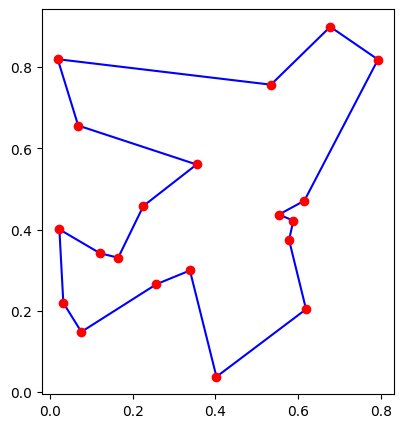

In [64]:
fig = plt.figure(figsize=(10,5))
ax2 = fig.add_subplot(121)
for first, second in zip(coords[:-1], coords[1:]):
    ax2.plot([first.x, second.x], [first.y, second.y], 'b')

ax2.plot([coords[0].x, coords[-1].x], [coords[0].y, coords[-1].y], 'b')


for c in coords:
    ax2.plot(c.x, c.y, 'ro')


plt.show()